In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
frame = pd.read_csv('data.csv')

In [3]:
frame.head(5)

,link_name,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,"The Sit-In Survival Guide: Pillows, Pizza and ...",183,55,15,155,17,0,10,0,1,n
1,Former UN General Assembly President Dies Amid...,75,12,9,53,0,2,0,20,0,n
2,Everything You Need to Know About Brexit and t...,99,14,23,91,0,2,1,3,2,n
3,Abortion Requests in Latin America Rise After ...,153,15,15,105,0,4,0,33,11,n
4,Prosecutor in Stanford Case Seeks Tougher Sex ...,538,53,40,479,23,3,4,2,27,n


In [4]:
frame.drop_duplicates(inplace = True)

In [5]:
frame.isnull().sum()

link_name        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
label            0
dtype: int64

In [6]:
frame.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,4056.144578,390.192771,950.196787,2999.176707,298.658635,198.301205,122.783133,304.401606,132.851406
std,11675.494345,646.593919,3033.099928,9284.291225,1706.824894,611.615221,419.464945,1308.026055,304.567273
min,75.000000,4.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,453.000000,53.000000,53.000000,336.000000,3.000000,11.000000,2.000000,2.000000,2.000000
50%,1186.000000,168.000000,158.000000,744.000000,14.000000,26.000000,8.000000,11.000000,16.000000
75%,3558.000000,499.000000,625.000000,2139.000000,123.000000,92.000000,53.000000,71.000000,105.000000
max,156420.000000,6912.000000,34389.000000,124804.000000,25611.000000,6197.000000,3278.000000,17278.000000,1954.000000


In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   link_name      249 non-null    object
 1   num_reactions  249 non-null    int64 
 2   num_comments   249 non-null    int64 
 3   num_shares     249 non-null    int64 
 4   num_likes      249 non-null    int64 
 5   num_loves      249 non-null    int64 
 6   num_wows       249 non-null    int64 
 7   num_hahas      249 non-null    int64 
 8   num_sads       249 non-null    int64 
 9   num_angrys     249 non-null    int64 
 10  label          249 non-null    object
dtypes: int64(9), object(2)
memory usage: 23.3+ KB


In [8]:
le = LabelEncoder()

In [9]:
test_num_col = frame.select_dtypes(include = np.number).columns
print("Numerical Columns :\n", test_num_col)
test_cat_col = frame.select_dtypes(exclude = np.number).columns
print("Categorical Columns :\n", test_cat_col)

Numerical Columns :
 Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')
Categorical Columns :
 Index(['link_name', 'label'], dtype='object')


In [10]:
frame['link_name'] = le.fit_transform(frame['link_name'])
frame['label'] = le.fit_transform(frame['label'])

In [11]:
X = frame['link_name']
y = frame['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
print(X_train.shape, y_train.shape)

(174,) (174,)


In [14]:
svc = svm.SVC(kernel = 'linear')
svc.fit(X_train.values.reshape(-1, 1), y_train)

SVC(kernel='linear')

In [15]:
y_pred = svc.predict(X_test.values.reshape(-1, 1))

In [16]:
print(confusion_matrix(y_test, y_pred))

[[65  0]
 [10  0]]


In [17]:
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.00      0.00        10

    accuracy                           0.87        75
   macro avg       0.93      0.50      0.46        75
weighted avg       0.88      0.87      0.80        75



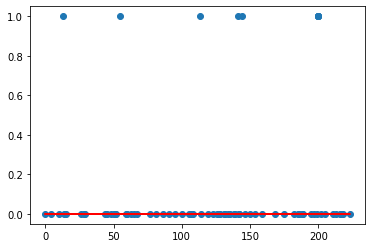

In [18]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')
plt.show()

In [19]:
mlp = MLPClassifier()
mlp.fit(X_train.values.reshape(-1, 1), y_train)

MLPClassifier()

In [20]:
mlp_pred = svc.predict(X_test.values.reshape(-1, 1))

In [21]:
print(confusion_matrix(y_test, mlp_pred))

[[65  0]
 [10  0]]


In [22]:
print(classification_report(y_test, mlp_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.00      0.00        10

    accuracy                           0.87        75
   macro avg       0.93      0.50      0.46        75
weighted avg       0.88      0.87      0.80        75



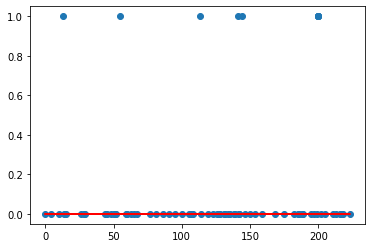

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, mlp_pred, color='r')
plt.show()

In [24]:
mnb = MultinomialNB()
mnb.fit(X_train.values.reshape(-1, 1), y_train)

MultinomialNB()

In [25]:
mnb_pred = svc.predict(X_test.values.reshape(-1, 1))

In [26]:
print(confusion_matrix(y_test, mnb_pred))

[[65  0]
 [10  0]]


In [27]:
print(classification_report(y_test, mnb_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        65
           1       1.00      0.00      0.00        10

    accuracy                           0.87        75
   macro avg       0.93      0.50      0.46        75
weighted avg       0.88      0.87      0.80        75



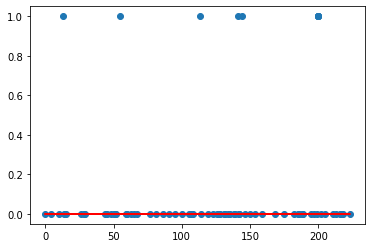

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, mnb_pred, color='r')
plt.show()

In [29]:
print(X_train.shape, y_train.shape)

(174,) (174,)


In [30]:
mnb_scores = cross_val_score(mnb, X_train.values.reshape(-1, 1), y_train, cv=2)
svc_scores = cross_val_score(svc, X_train.values.reshape(-1, 1), y_train, cv=2)
mlp_scores = cross_val_score(mlp, X_train.values.reshape(-1, 1), y_train, cv=2)

c:\users\mohdm\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\mohdm\appdata\local\programs\python\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
print("For Multinomial NB: ", mnb_scores)
print("For SVM: ", svc_scores)
print("For Multi-layer Perceptron: ", mlp_scores)

For Multinomial NB:  [0.93103448 0.93103448]
For SVM:  [0.93103448 0.93103448]
For Multi-layer Perceptron:  [0.93103448 0.93103448]
